In [1]:
import matplotlib.pylab as plt
import numpy as np 

def get_acc(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    
    best_acc = []
    for line in lines:
        if "Train Epoch" in line:
            best_acc.append(float(line.split("Best Accuracy:")[-1].split('%')[0]))
    #acc.append(best_acc)
    
    return best_acc

def plot_dict(data, title):
    plt.figure(figsize=(4,4))
    
    step = float(title.split('_')[-1])
    
    length = len(data[list(data.keys())[0]])
    
    xticks = []
    for i in range(length):
        xticks.append((1-step)**i)
    #xticks = np.array(xticks)
    
    for key in data:
        if key == 'lt':
            plt.plot(xticks,data[key], label=key,c='black')
            plt.scatter(xticks,data[key], c='black')
        elif 'g_kl' in key:
            plt.plot(xticks,data[key], label=key, ls='dotted')
            plt.scatter(xticks,data[key], marker='*')
        else:
            plt.plot(xticks,data[key], label=key, ls='-.')
            plt.scatter(xticks,data[key], marker='x')
    
    plt.legend()
    plt.title(title)
    plt.xlabel("Parameter ratio after pruning")
    plt.ylabel("Acc")
    plt.xlim([1.01, -0.01])
    plt.show()
    
    return

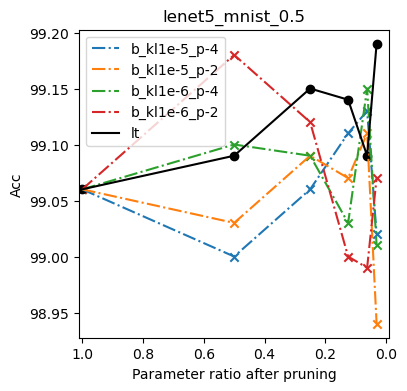

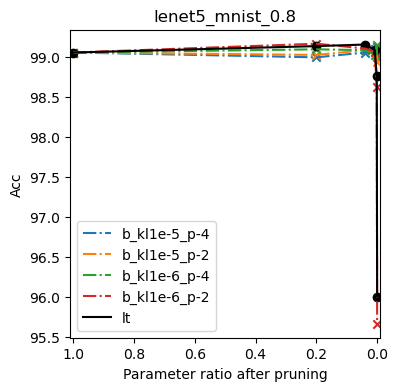

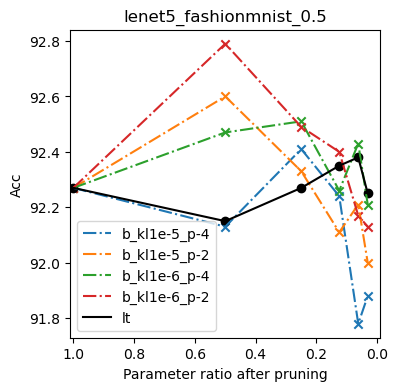

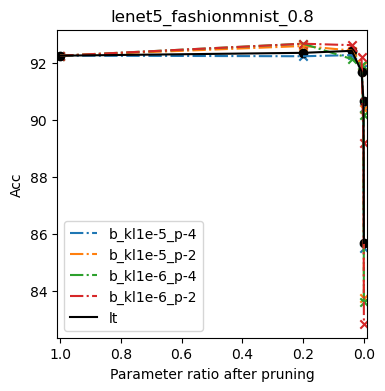

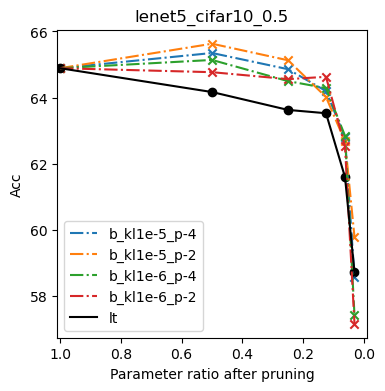

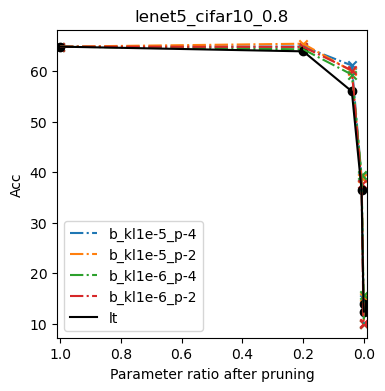

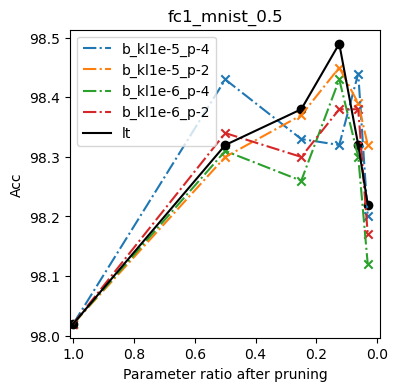

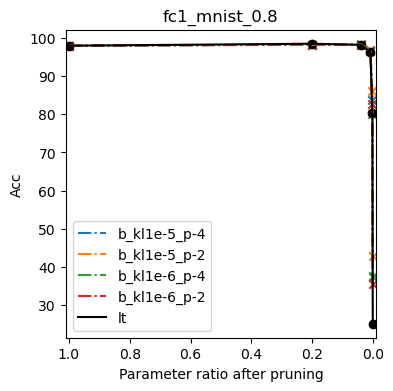

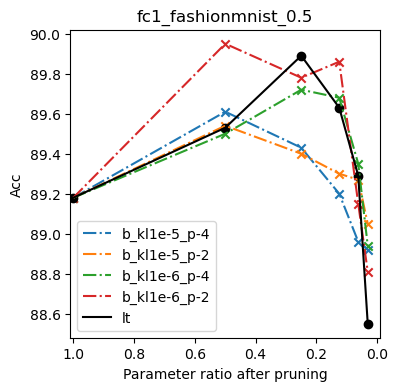

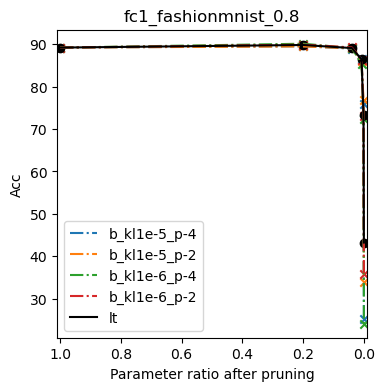

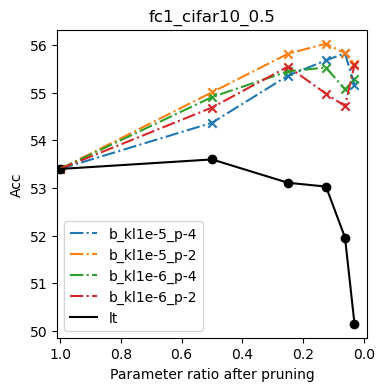

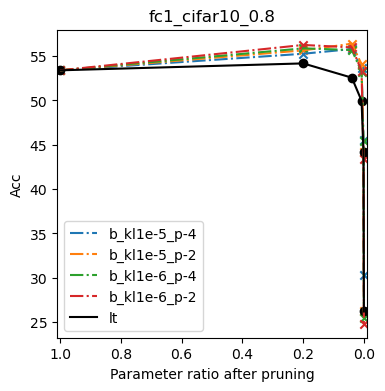

In [2]:
datasets = ['mnist', 'fashionmnist', 'cifar10']
model = ['lenet5', 'fc1']
prune_rate = [0.5, 0.8]
kls = ["1e-5", "1e-6"]
priors = [-4, -2]
root = 'Adam_rerun/'

acc = []
for arch_type in model:
    
    for dataset in datasets:
        
        for percent in prune_rate:
            
            KL_prune = {}
            for kl in kls:
                for prior in priors:
                    file = (root+"bernoulli_kl{"+kl+
                            "}_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_prior{"+str(prior)+
                            "}_percent{"+str(percent)+"}.out")
                    KL_prune["b_kl"+kl+'_p'+str(prior)] = get_acc(file)
        
            file = (root+"lt_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_percent{"+str(percent)+"}.out")
            KL_prune["lt"] = get_acc(file)
            #print(len(KL_prune))       
            plot_dict(KL_prune, arch_type+'_'+dataset+'_'+str(percent))

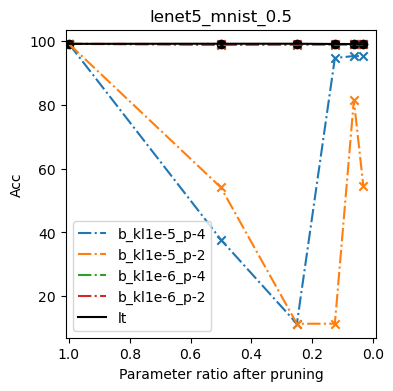

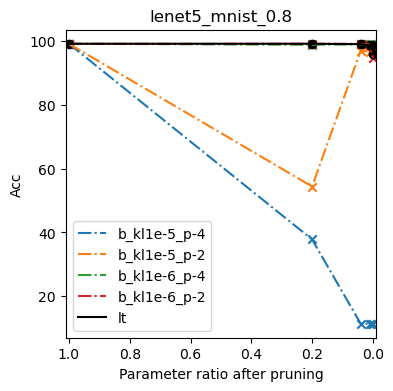

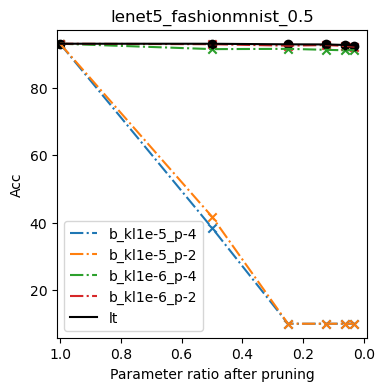

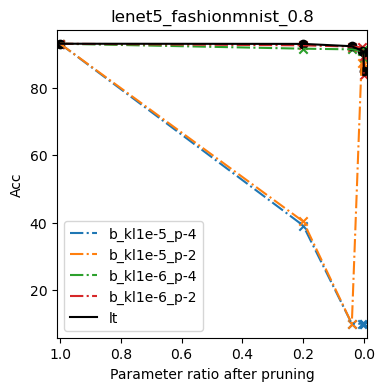

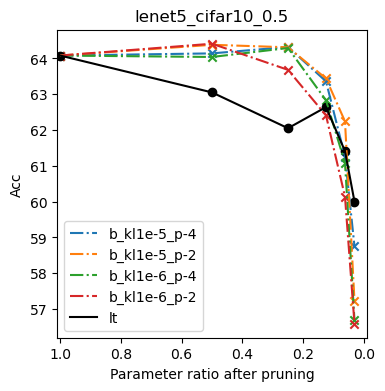

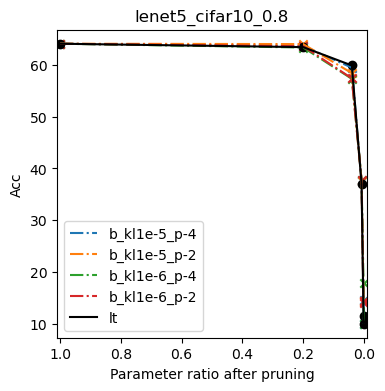

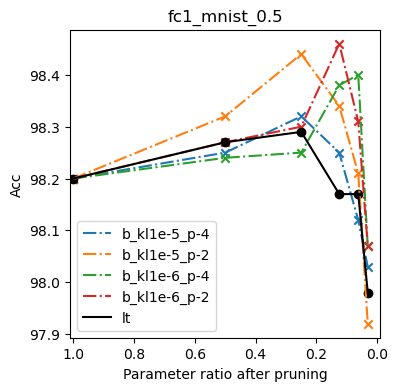

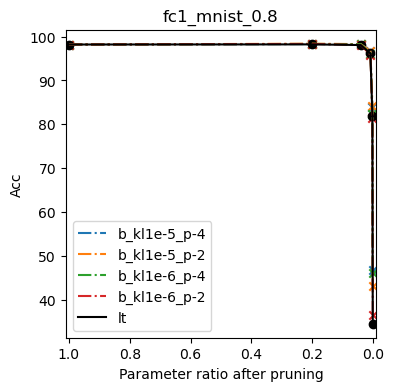

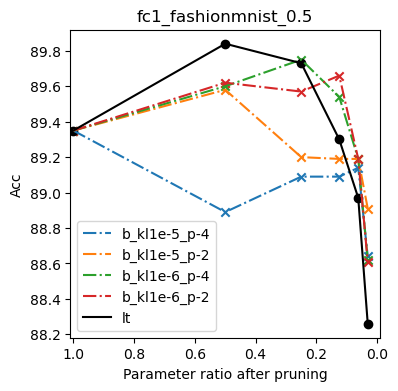

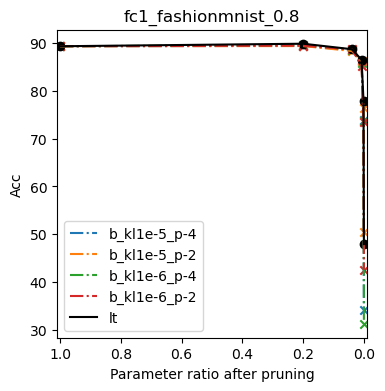

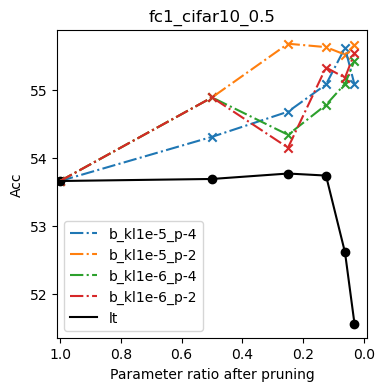

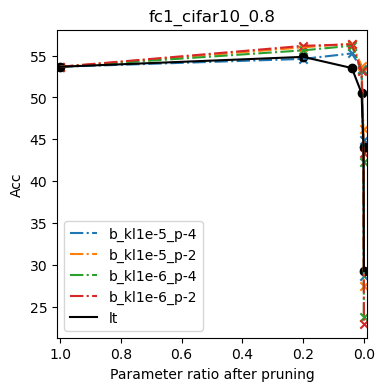

In [3]:
datasets = ['mnist', 'fashionmnist', 'cifar10']
model = ['lenet5', 'fc1']
prune_rate = [0.5, 0.8]
kls = ["1e-5", "1e-6"]
priors = [-4, -2]
root = 'SGD_lr_large/'

acc = []
for arch_type in model:
    
    for dataset in datasets:
        
        for percent in prune_rate:
            
            KL_prune = {}
            for kl in kls:
                for prior in priors:
                    file = (root+"bernoulli_kl{"+kl+
                            "}_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_prior{"+str(prior)+
                            "}_percent{"+str(percent)+"}.out")
                    KL_prune["b_kl"+kl+'_p'+str(prior)] = get_acc(file)
        
            file = (root+"lt_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_percent{"+str(percent)+"}.out")
            KL_prune["lt"] = get_acc(file)
            #print(len(KL_prune))       
            plot_dict(KL_prune, arch_type+'_'+dataset+'_'+str(percent))

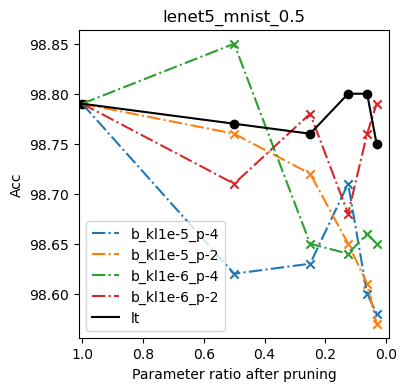

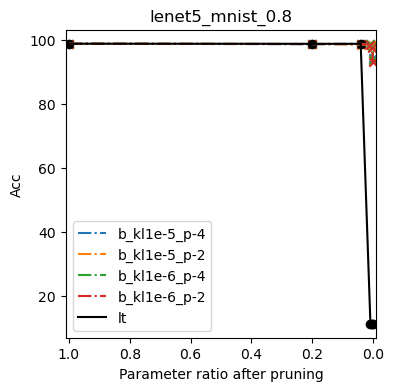

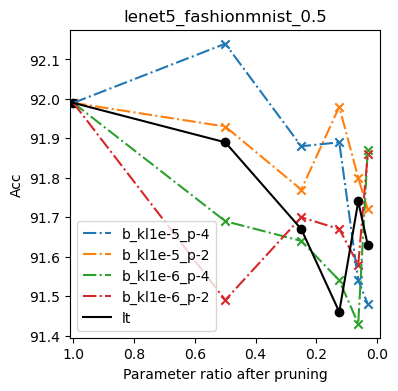

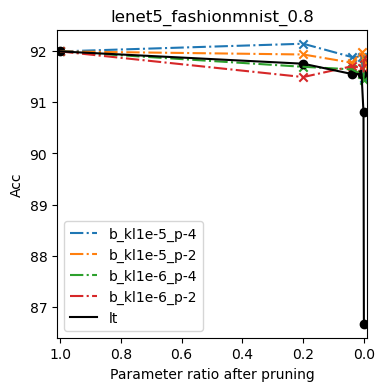

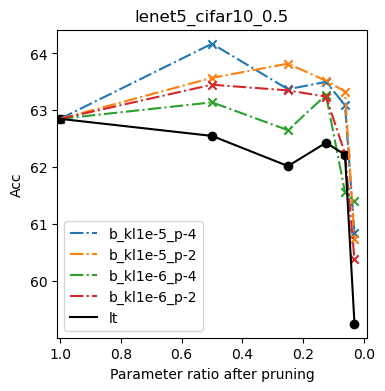

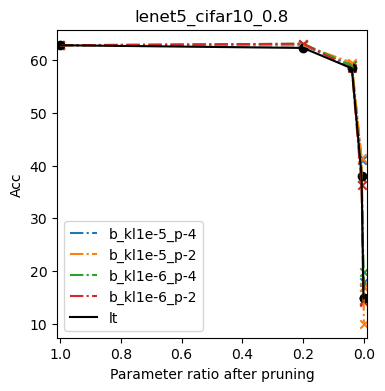

In [7]:
datasets = ['mnist', 'fashionmnist', 'cifar10']
model = ['lenet5']
prune_rate = [0.5, 0.8]
kls = ["1e-5", "1e-6"]
priors = [-4, -2]
root = 'small_lr_sgd_beta=0.9,lr=1e-3/'

acc = []
for arch_type in model:
    
    for dataset in datasets:
        
        for percent in prune_rate:
            
            KL_prune = {}
            for kl in kls:
                for prior in priors:
                    file = (root+"bernoulli_kl{"+kl+
                            "}_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_prior{"+str(prior)+
                            "}_percent{"+str(percent)+"}.out")
                    KL_prune["b_kl"+kl+'_p'+str(prior)] = get_acc(file)
        
            file = (root+"lt_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_percent{"+str(percent)+"}.out")
            KL_prune["lt"] = get_acc(file)
            #print(len(KL_prune))       
            plot_dict(KL_prune, arch_type+'_'+dataset+'_'+str(percent))

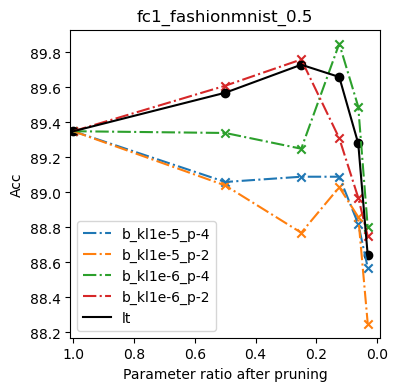

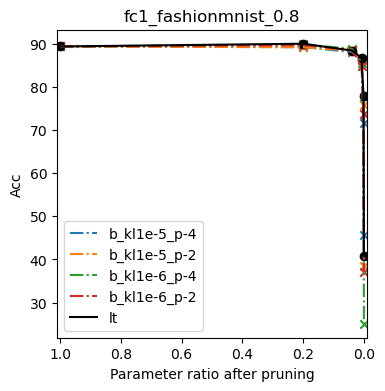

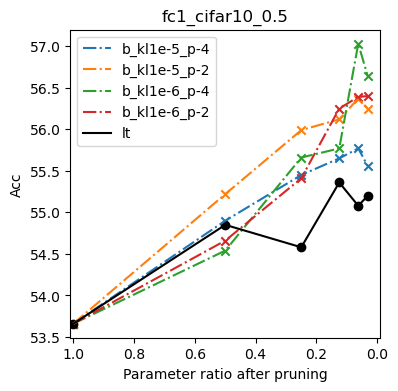

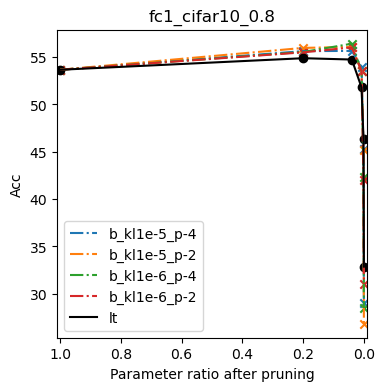

FileNotFoundError: [Errno 2] No such file or directory: 'sgd_init_original/bernoulli_kl{1e-5}_data{fashionmnist}_arch{lenet5}_prior{-2}_percent{0.5}_wd1e-4.out'

In [5]:
datasets = ['fashionmnist', 'cifar10']
model = ['fc1', 'lenet5']
prune_rate = [0.5, 0.8]
kls = ["1e-5", "1e-6"]
priors = [-4, -2]
root = 'sgd_init_original/'

acc = []
for arch_type in model:
    
    for dataset in datasets:
        
        for percent in prune_rate:
            
            KL_prune = {}
            for kl in kls:
                for prior in priors:
                    file = (root+"bernoulli_kl{"+kl+
                            "}_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_prior{"+str(prior)+
                            "}_percent{"+str(percent)+"}_wd1e-4.out")
                    KL_prune["b_kl"+kl+'_p'+str(prior)] = get_acc(file)
        
            file = (root+"lt_data{"+dataset+
                            "}_arch{"+arch_type+
                            "}_percent{"+str(percent)+"}_wd1e-4.out")
            KL_prune["lt"] = get_acc(file)
            #print(len(KL_prune))       
            plot_dict(KL_prune, arch_type+'_'+dataset+'_'+str(percent))